# Machine Learning Live Demo: 

### Introduction: 
As part of our Technical R&D Series, I wanted to build a simple machine learning example to motivate some of the ideas I touched upon in the presentation. As a simple example, I have used a famous "toy" dataset from `Scikit-Learn` called `Boston Housing`. This dataset captures information about houses in Boston, with the target variable being the median value of owner occupied homes. For simplicity, I used a very simple ML model: a `DecisionTree`. 

### Workflow: 
    1) Define Problem 
    2) Acquire Data 
    3) Cleaning and Wrangling 
    4) Exploratory Data Analysis 
    5) Build a Model + Evaluate
    6) Tune the Model 

### Part One: Problem Definition: 

The purpose of this analysis is to build a model that can predict the Median Value of Owner Occupied Homes in the Boston Area. This information is caputred in the `MEDV` column in the dataset. Since the target variable is continuous, the problem is well suited to simpler machine learning methods such as OLS Regression and Decision Trees. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn as sk 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

%matplotlib inline
plt.style.use("dark_background")

### Part Two/Three: Data Acquisition + Cleaning/Wrangling  

`Scikit-Learn` is a particularly useful library as it contains several "toy" datasets, which are pre-cleaned and wrangled. This allows them ML techniques to be applied to them almost out of the box. This data was acquired using the `datasets` module of `Scikit-Learn` and loaded using the `load_boston` function. A common convention in these build in datasets is to split up the feature data and the target data. It is typically best practise to assign the feature data to an `X` variable, and the target data to a `y` variable. 

In [2]:
# Loading in the data and splitting feature/target into X and y. 

data = load_boston()
X = data.data 
y = data.target

In [3]:
# Printing the Data description to understand what each feature contains. 

print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
df = pd.DataFrame(data = data.data, columns = data.feature_names) 
df['Target'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Part Four: Exploratory Data Analysis 

Exploratory Data Analysis (EDA) is an important step as it gives us a look at pre-existing patterns and relationships in the data. This is very informative to the model building process, as we can see what features could be more important to the prediction of the target. It can also bring awareness to any additional data issues that were not caught during the cleaning/wrangling process such as unequal column lengths, null values or mismatched data types. 

Since the dataset is fairly simple, I employed two inexpensive EDA techniques. The first was using the build in `describe` method `pandas`. This returns a dataframe that generates summary statistics of central tendancy and dispursion. The second was a correlation matrix visualized using a heatmap from the `seaborn` library. Correlation matrices are useful as they show what variables have strong linear relationships to each other, but in their pure numeric form it can be hard to extract information form them. Using a heatmap, the strength of the lienar relationships are encoded using color, allowing viewers to more easily extract information. Additionally, since correlation matrixes are symmetrical across the diagonal, I applied a mask to hide the upper half to reduce visual clutter. 

In [5]:
# Generating a dataframe for easier data visualization. 

df = pd.DataFrame(X, columns = data.feature_names)
df['MEDV'] = y
df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# Using the built in dataframe method describe. 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


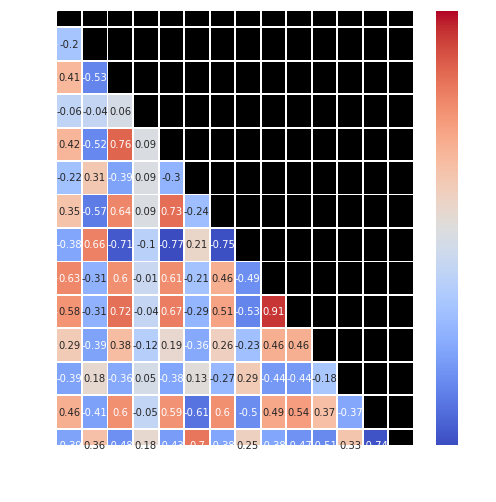

In [7]:
# Using Pandas built in corr method to generate a correlation matrix on the dataframe. 
corr = df.corr(method = 'pearson').round(2)

# Generating a mask to hide the upper half of heatmap. 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plotting the heatmap. 
plt.figure(figsize = (8,8))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, linewidths = .8, annot_kws={"size": 10}, mask = mask)

### Part Five: Model Building and Evalution 

All models were implemented using `Scikit-Learn`. The library contains all "classical" ML algorithms as well as several model selection and evaluation tools. These include functions like `train_test_split`, `KFold` and `cross_val_score`. It is widely accepted that if a ML algorithm is _not_ implemented with `Scikit-Learn`, for example implementing a Neural Network in `tensorflow`, it is best to implement the algorithm in such a way that is compatible with `Scikit-Learn` functions. 

The first step for implementing a machine learning model is to split the data into a train and test split. This is generaly done to prevent model overfitting. Once the data is split, the model of choice is fit to the training data (this is where the learning happens), then the model is evaluated on the test data. It is important to note that there is no 'one size fits all' evaluation metric - these will change depending on the model chosen and the objective of the anlysis (this is a very in depth topic). To further prevent model overfitting (one of the most dangerous phenomenons in ML), I like to repeat this proccess several times, and average the results. This ensures that I obtain the full picture of the model's performance. 


The model I used was a `DecisionTreeRegressor` from `Scikit-Learn`. Tree based methods are quite useful as they are flexible, cheap to implement and maintain a high degree of explainability. There are also a few tunable hyper-parameters that can yield significant performance gains. The main downside of using Tree based methods is that they have a tendancy to overfit.


To evaluate the model, I kept track of two metrics: The Feature Importances and the Coefficient of Determination. The feature importances are indicative of of the input variables that have the largest effect on the model's prediction. This is particularly useful as it aids in the feature selection proccess. In general, the simplest model with the highest predictive capability is the best. To achieve this, we ideally drop the unimportant features with the goal of simplifying the overall model. The feature importances were plotted on a sorted horizontal bar chart aiding in the visual analysis process. We see that `RM` ,`LSTAT` and `DIS` are the top three most important features. Comparing these results to the correlation heatmap, we see that `RM` and `LSTAT` are very strongly correlated with `MEDV`. 

The _Coefficient of Determination_ or R-Squared is a measure of the proportion of the variance in the target variable that can be predicted with the feature variables. Higher values of R-Squared suggest that the model is able to generate more accurate predictions, though higher does not always mean better. To visualize the model's performance, I kept track of the R-Squared value over each iteration and plotted it. This allowed me to see the overall reliability of the model. Over 100 iterations the average score of the model was 72.85% with a standard deviation of 8.19%. For the base model the performance is good, but it is still worth tuning the model to see if any additional performance can be gained.  

In [18]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 

reg_scores = [] 
for i in range(100): 
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=1/3) 
    regressor.fit(X_tr, y_tr) 
    reg_scores.append(regressor.score(X_te, y_te))
print(np.mean(reg_scores))
print(np.mean(reg_scores))

0.7069877033120454
0.7069877033120454


In [21]:
from sklearn.tree import DecisionTreeRegressor 
tree = DecisionTreeRegressor()

tree_scores = []
for i in range(100): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)
    tree.fit(X_train, y_train) 
    tree_scores.append(tree.score(X_test, y_test))
print(np.mean(tree_scores))
print(np.std(tree_scores))

0.7419816469485181
0.0851479586477582


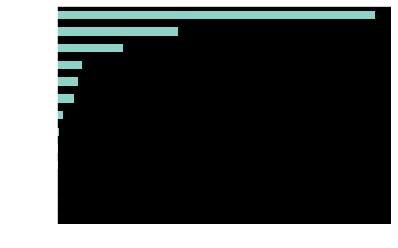

In [22]:
feat_importances = pd.Series(tree.feature_importances_, index = data.feature_names)
feat_importances.sort_values(ascending = True).plot(kind='barh')

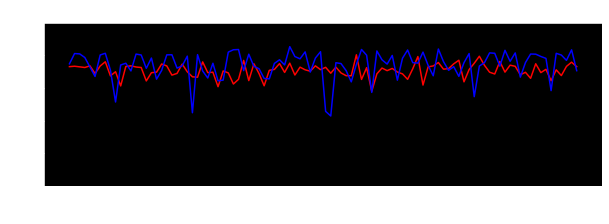

In [24]:
plt.figure(figsize = (10, 3))
plt.ylim(0, 1)
plt.title('Decision Tree R-Squared over 100 Iterations')
plt.ylabel('R-Squared')
plt.xlabel('Iteration Number')
plt.plot(reg_scores, color = 'red')
plt.plot(tree_scores, color = 'blue')

### Part Six: Tuning the Model 

The original `DecisionTree` was fit to the entire dataset, but it is important to note that the numbers were not scaled. The different variables measure vastly different metrics, so the variance of each feature is widely different. This can have adverse effects on the model's performance, as normally distributed data is generally more effective in machine learning applications. Below I apply a`StandardScaler` to the dataset then refit the decision tree to it. 

Decision Trees have a few hyper-paramters that can be tuned to improve performance and combat overfitting. The main hyper-parameter of the `DecisionTreeRegressor` is the max-depth. 

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [13]:
tree_std = DecisionTreeRegressor()
std_scores = []
for i in range(100):
    X_train_std, X_test_std, y_train, y_test = train_test_split(X_std, y, test_size = 1/3)
    tree_std.fit(X_train_std, y_train)
    std_scores.append(tree_std.score(X_test_std, y_test))

In [14]:
print(np.mean(std_scores))
print(np.std(std_scores))

0.7141785625508514
0.09266737633470461


Text(0.5, 0, 'Iteration Number')

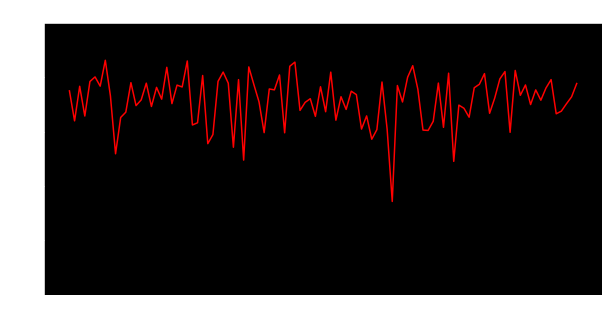

In [15]:
plt.figure(figsize = (10, 5))
plt.ylim(0, 1)
plt.title('R-Squared for Tree Regressor over 100 Iterations')
plt.plot(std_scores, color = "red")
plt.ylabel('R-Squared Value')
plt.xlabel('Iteration Number')

-28.836842385744706 [10]
CPU times: user 503 ms, sys: 3.75 ms, total: 507 ms
Wall time: 508 ms


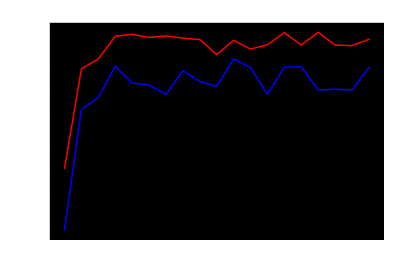

In [20]:
%%time 
# Using cross validation for hyper-paramter tuning: 

from sklearn.model_selection import cross_val_score

cv_scores_tr = []
cv_scores_te = []
for k in np.arange(1, 20):
    reg = DecisionTreeRegressor(max_depth = k)
    reg.fit(X_train_std, y_train)
    cv_score_tr = cross_val_score(reg, X_train_std, y_train, scoring="neg_mean_squared_error", cv = 5)
    cv_score_te = cross_val_score(reg, X_test_std, y_test, scoring="neg_mean_squared_error", cv = 5)    
    cv_scores_tr.append(cv_score_tr)
    cv_scores_te.append(cv_score_te)
        
cv_scores_tr = np.array(cv_scores_tr)        
cv_scores_te = np.array(cv_scores_te)
plt.plot(np.mean(cv_scores_tr, axis=1), c = 'red')
plt.plot(np.mean(cv_scores_te, axis =1), c = 'blue')
plt.title('Max Depth Tuning')
plt.ylabel('Negative Mean Squared Error')
plt.xlabel('Max Depth')
print(np.max(np.mean(cv_scores_te, axis=1)), [np.argmax(np.mean(cv_scores_te, axis=1))])

### Implementation of Sklearn Pipelines: 

In [29]:
from sklearn.pipeline import FeatureUnion, make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler

In [34]:
pipeline = make_pipeline(scaler, tree)

In [35]:
scores = []
for i in range(50): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)
    pipeline.fit(X_train, y_train)
    scores.append(pipeline.score(X_test, y_test))
print(np.mean(scores), np.std(scores))

0.7169833632559691 0.08911521068020116


In [36]:
pipeline.steps

[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('decisiontreeregressor',
  DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'))]